#### Для начала загрузим датасет и обработаем данные. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!wget -O "train.csv" -q "https://www.dropbox.com/s/5bz5a968eeryroj/churn_prediction.csv?dl=0"

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2183,45,75.15,3480.35,Male,1,Yes,No,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),0
1346,72,64.45,4641.1,Male,1,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
1548,15,19.80,304.6,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0


In [6]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
y = train['Churn']
X = train.drop(columns='Churn')

In [8]:
X.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [9]:
X['TotalSpent'] = pd.to_numeric(X['TotalSpent'], errors ='coerce')

In [10]:
X.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [11]:
X.TotalSpent.fillna(X.TotalSpent.median(), inplace=True)

<ipython-input-11-252a5e12e2a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.TotalSpent.fillna(X.TotalSpent.median(), inplace=True)


In [12]:
num_data = X.select_dtypes([np.number])
num_features = num_data.columns
cat_data = cat_data = X.select_dtypes(include=['object', 'category'])
cat_features = cat_data.columns

In [13]:
for i in cat_features:
  print(X[i].value_counts())
  print('-------------------------------------')

Sex
Male      2655
Female    2627
Name: count, dtype: int64
-------------------------------------
HasPartner
No     2705
Yes    2577
Name: count, dtype: int64
-------------------------------------
HasChild
No     3676
Yes    1606
Name: count, dtype: int64
-------------------------------------
HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64
-------------------------------------
HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64
-------------------------------------
HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64
-------------------------------------
HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64
-------------------------------------
HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int

In [13]:
X = pd.concat([X[num_features], pd.get_dummies(X[cat_features], drop_first=True)], axis=1)
X.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
53,26,86.65,2208.75,0,True,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
4801,65,104.10,6700.05,0,True,True,True,True,False,True,...,False,True,False,True,False,True,True,False,False,False
5206,66,102.85,6976.75,1,False,False,False,True,False,True,...,False,True,False,True,True,False,True,True,False,False


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

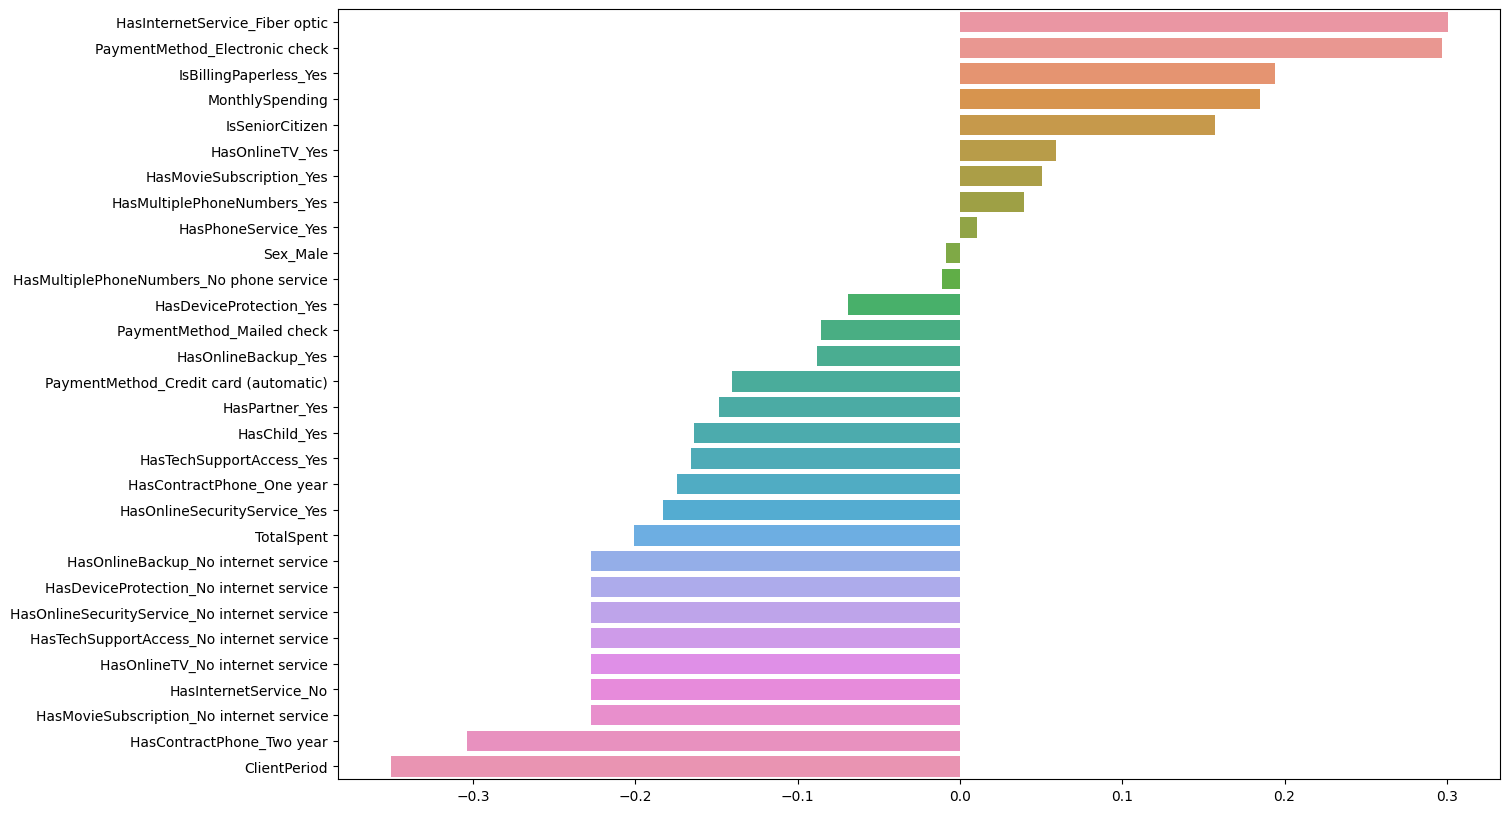

In [15]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Для совсем простой обработки хватит. Для логистической регрессии всегда нужно кодировать категориальные признаки. В целом обычно используются все те же методы, что и в линейной регрессии:

- Заполнение пропусков (чаще всего средним значением или медианой)
- Кодировка (OneHotEncoder, LabelEncoder, BinaryEncoder, HelmetEncoder, Backward-Difference Encoder, TargetEncoding ...)
- Масштабирование признаков (StandardDcaler, MinMaxScaler)
- Добавление признаков (полиномиальные признаки, взятие логарифма, квадратного корня, применение тригонометрических функий)
- Удаление выбросов/шума

Функция потерь для логистической регрессии - LogLoss или кросс-энтропия
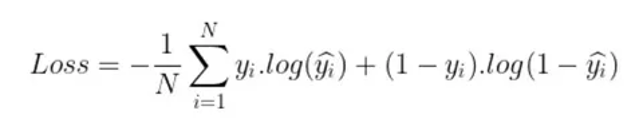

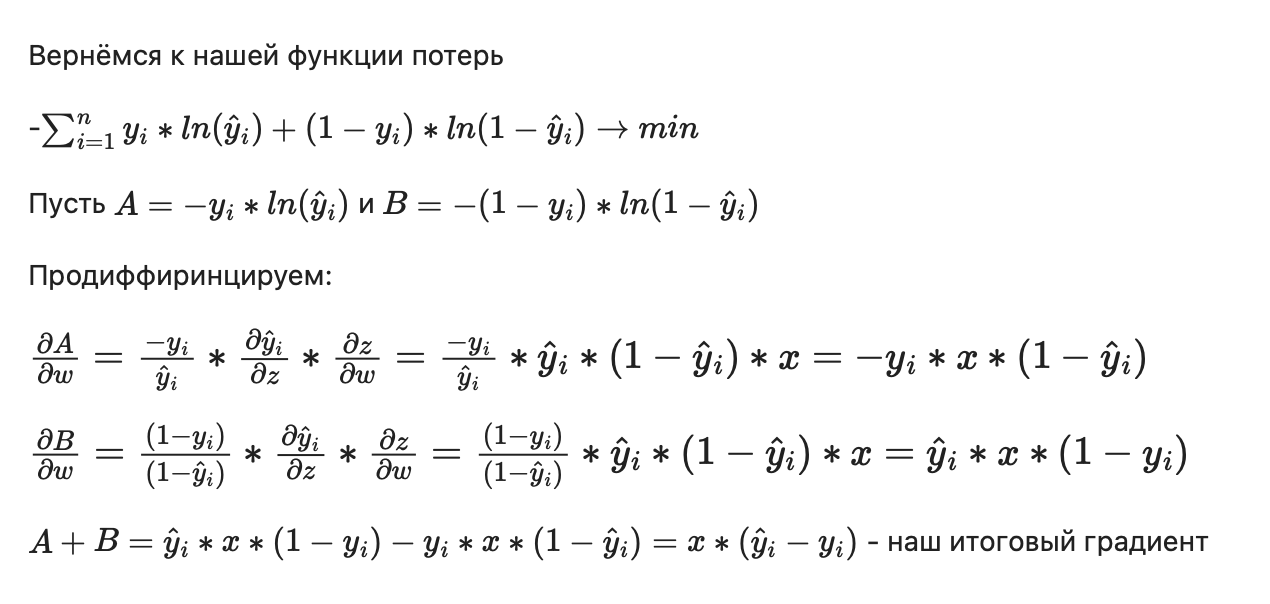

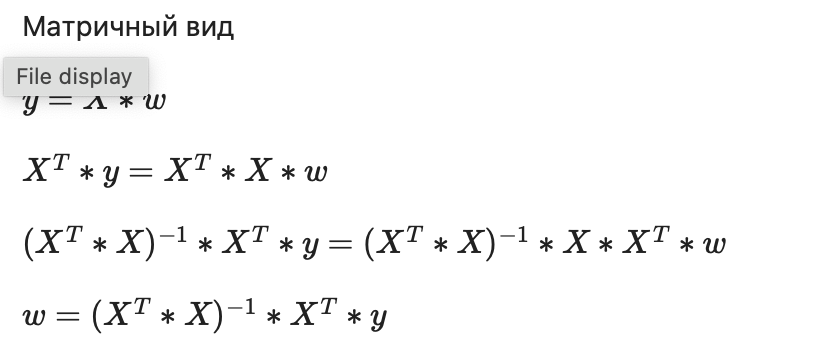

In [51]:
import numpy as np

def sigmoid(x):
    x = np.array(x, dtype=float) 
    return 1 / (1 + np.exp(-x))

class MyLogisticRegression():

    def __init__(self, lr = 0.001, n_iters = 1000, penalty = None, lyambda = 0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.penalty = penalty
        self.lyambda = lyambda
        self.weights = None
        self.bias = None
        self.losses = None


    def fit(self, X, y): # X - матрица признаков, y - вектор таргетов
        n_samples, n_features = X.shape # Получаем размерность входных данных — сколько строк (объектов) и сколько признаков.
        self.weights = np.zeros(n_features)
        self.bias = 0
        count_loss = []
        for i in range(self.n_iters):
            y_linear_pred = np.dot(X, self.weights) + self.bias # произв признаков и весов
            y_pred = sigmoid(y_linear_pred)# применяем сигмоиду → превращаем результат в вероятности (подходит для логистической регрессии).
            curr_loss = self.__loss(y, y_pred)
            count_loss.append(curr_loss)

            if self.penalty == None:
                dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            if self.penalty == "l2":
                dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.lyambda * self.weights
            if self.penalty == "l1":  
                dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) + 2 * np.array([self.lyambda if j >= 0 else -self.lyambda for j in self.weights])

            db = (1/n_samples) * np.sum(y_pred - y) # Градиент по bias — это просто средняя ошибка по всем примерам.
                
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
        self.losses = count_loss
            

    def predict(self, X, threshold = 0.5):
        return self.predict_proba(X) >= threshold

    def predict_proba(self, X):
        y_linear_pred = np.dot(X, self.weights) + self.bias 
        return sigmoid(y_linear_pred) # считаем вероятности для каждого класса

    def __loss(self, y, p):
        if self.penalty == None:
            return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))
        if self.penalty == "l2":
            return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p)) + self.lyambda * abs(self.weights)
        if self.penalty == "l1":  
            return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p)) + self.lyambda * self.weights**2
     
    def get_losses(self):
        return self.losses
        

Распиши метрики

In [38]:
def true_positive(real, prediction):
    tr = 0
    for re, pred in zip(real, prediction):
        if re == 1 and pred == 1:
            tr += 1
    return tr

def true_negative(real, prediction):
    tn = 0
    for re, pred in zip(real, prediction):
        if re == 0 and pred == 0:
            tn += 1
    return tn

def false_positive(real, prediction):
    fp = 0
    for re, pred in zip(real, prediction):
        if re == 0 and pred == 1:
            fp += 1
    return fp

def false_negative(real, prediction):
    fn = 0
    for re, pred in zip(real, prediction):
        if re == 1 and pred == 0:
            fn += 1
    return fn

In [39]:
def accuracy(real, prediction):
    tp = true_positive(real, prediction)
    tn = true_negative(real, prediction)
    fp = false_positive(real, prediction)
    fn = false_negative(real, prediction)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [40]:
def precision(real, prediction):
    tp = true_positive(real, prediction)
    fp = false_positive(real, prediction)
    prec = tp / (tp + fp)
    return prec

In [41]:
def recall(real, prediction):
    tp = true_positive(real, prediction)
    fn = false_negative(real, prediction)
    rec = tp / (tp + fn)
    return rec

In [42]:
def f1_score(real, prediction):
    p = precision(real, prediction)
    r = recall(real, prediction)
    f1 = 2 * (p * r)/(p + r)
    return f1

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [27]:
import statsmodels.formula.api as smf
X1 = X.copy()
y1 = y.copy()
X1['Churn'] = y1
X1.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen',
       'Sex_Male', 'HasPartner_Yes', 'HasChild_Yes', 'HasPhoneService_Yes',
       'HasMultiplePhoneNumbers_No phone service',
       'HasMultiplePhoneNumbers_Yes', 'HasInternetService_Fiber optic',
       'HasInternetService_No', 'HasOnlineSecurityService_No internet service',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No internet service',
       'HasOnlineBackup_Yes', 'HasDeviceProtection_No internet service',
       'HasDeviceProtection_Yes', 'HasTechSupportAccess_No internet service',
       'HasTechSupportAccess_Yes', 'HasOnlineTV_No internet service',
       'HasOnlineTV_Yes', 'HasMovieSubscription_No internet service',
       'HasMovieSubscription_Yes', 'HasContractPhone_One year',
       'HasContractPhone_Two year', 'IsBillingPaperless_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='ob

In [28]:
import time

start = time.time()

log_regr = smf.logit('Churn ~ ClientPeriod + MonthlySpending + TotalSpent + IsSeniorCitizen + Sex_Male + HasPartner_Yes + HasChild_Yes + HasPhoneService_Yes + HasMultiplePhoneNumbers_Yes + HasOnlineTV_Yes + HasMovieSubscription_Yes + IsBillingPaperless_Yes', data=X1).fit()

stop = time.time()
log_regr.summary()

Optimization terminated successfully.
         Current function value: 0.436435
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5269
Method:                           MLE   Df Model:                           12
Date:                Wed, 26 Mar 2025   Pseudo R-squ.:                  0.2412
Time:                        08:03:21   Log-Likelihood:                -2305.3
converged:                       True   LL-Null:                       -3038.0
Covariance Type:            nonrobust   LLR p-value:                1.046e-306
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.0255      0.174     -5.909      0.000      -1.366      -0.685
Sex_Male[T.True]                        0.0022      0.073      0.031      0.976      -0.141       0.145
HasPartner_Yes[T.True]                  0.0117      0.086      0.136      0.892      -0.157       0.181
HasChild_Yes[T.True]                   -0.3381      0.099     -3.419      0.001      -0.532      -0.144
HasPhoneService_Yes[T.True]            -0.9589      0.143     -6.726      0.000      -1.238      -0.679
HasMultiplePhoneNumbers_Yes[T.True]     0.3283      0.091      3.621      0.000       0.151       0.506
HasOnlineTV_Yes[T.True]                -0.1124      0.097     -1.154      0.248      -0.303       0.078
HasMovieSubscription_Yes[T.True]       -0.0943      0.097     -0.971      0.332      -0.285       0.096
IsBillingPaperless_Yes[T.True]          0.5961      0.083      7.205      0.000       0.434       0.758
ClientPeriod                           -1.6658      0.156    -10.691      0.000      -1.971      -1.360
MonthlySpending                         0.8288      0.080     10.309      0.000       0.671       0.986
TotalSpent                              0.3338      0.163      2.050      0.040       0.015       0.653
IsSeniorCitizen                         0.1906      0.035      5.462      0.000       0.122       0.259
=======================================================================================================
"""

In [29]:
print(f"Training time: {stop - start}s")

Training time: 0.07692837715148926s


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [30]:

model1 = LogisticRegression(penalty='none')

start = time.time()
model1.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model1.predict_proba(X_test)[::,1]
y_train_pred = model1.predict_proba(X_train)[::,1]

print(f"Training time: {stop - start}s")

Training time: 0.05991220474243164s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


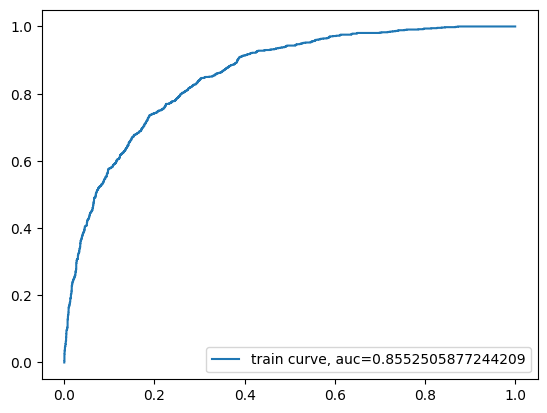

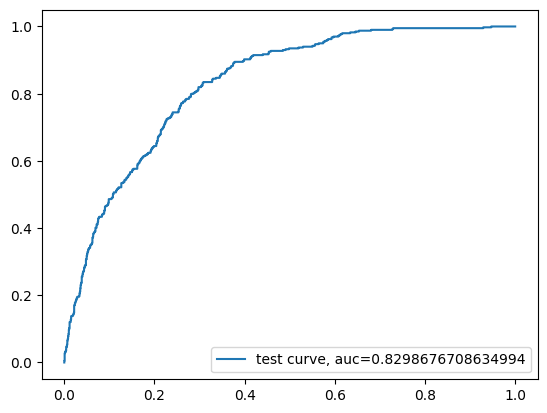

In [31]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()
     

In [32]:
model2 = LogisticRegression(penalty='l1', solver = 'liblinear')
	

start = time.time()
model2.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model2.predict_proba(X_test)[::,1]
y_train_pred = model2.predict_proba(X_train)[::,1]
     
print(f"Training time: {stop - start}s")

Training time: 0.13313603401184082s


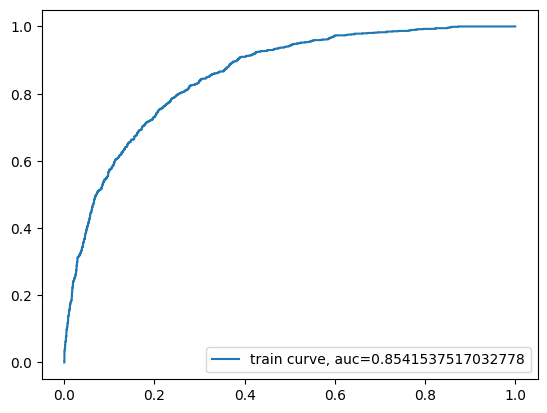

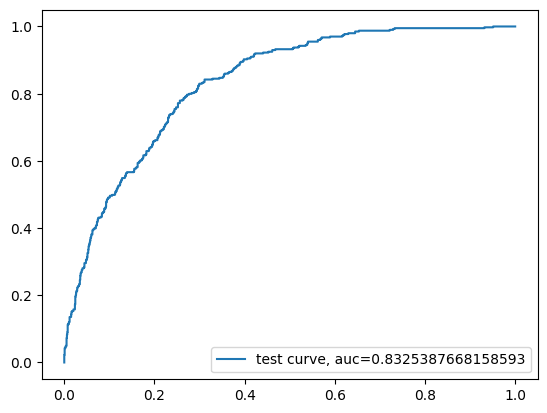

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()
     

In [43]:
train_pred = model2.predict(X_train)
test_pred = model2.predict(X_test)

print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1_score(y_train, train_pred))
print('my_f1_test = ', f1_score(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.6169977924944812
f1_test =  0.5513513513513513
my_f1_train =  0.6169977924944812
my_f1_test =  0.5513513513513513
recall_train =  0.5675126903553299
recall_test =  0.5112781954887218
my_recall_train =  0.5675126903553299
my_recall_test =  0.5112781954887218
precision_train =  0.6759371221281741
precision_test =  0.5982404692082112
my_precision_train =  0.6759371221281741
my_precision_test =  0.5982404692082112
accuracy_train =  0.8122802272112524
accuracy_test =  0.7905362776025237
my_accuracy_train =  0.8122802272112524
my_accuracy_test =  0.7905362776025237


метрики посчитались верно

In [44]:
model3 = LogisticRegression(penalty='l2')

start = time.time()
model3.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model3.predict_proba(X_test)[::,1]
y_train_pred = model3.predict_proba(X_train)[::,1]

print(f"Training time: {stop - start}s")

Training time: 0.04469585418701172s


Протестируем нашу имплементацию

In [52]:

model4 = MyLogisticRegression(lr = 5, n_iters=100)

start = time.time()
model4.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model4.predict_proba(X_test)
y_train_pred = model4.predict_proba(X_train)
     
print(f"Training time: {stop - start}s")

Training time: 1.5126490592956543s


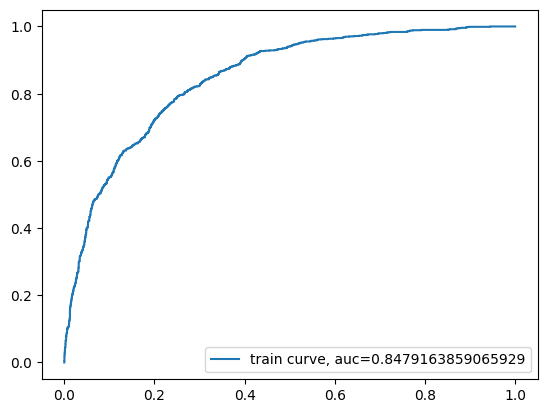

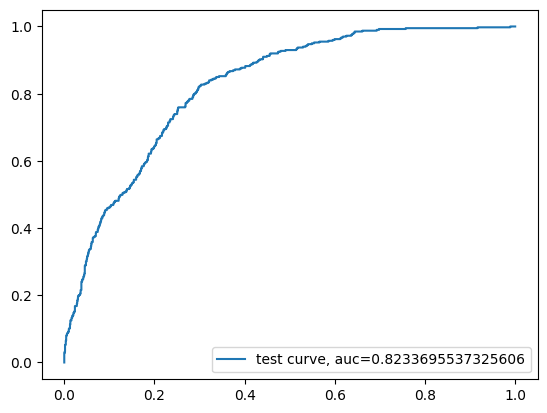

In [53]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [55]:

print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1_score(y_train, train_pred))
print('my_f1_test = ', f1_score(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.6169977924944812
f1_test =  0.5513513513513513
my_f1_train =  0.6169977924944812
my_f1_test =  0.5513513513513513
recall_train =  0.5675126903553299
recall_test =  0.5112781954887218
my_recall_train =  0.5675126903553299
my_recall_test =  0.5112781954887218
precision_train =  0.6759371221281741
precision_test =  0.5982404692082112
my_precision_train =  0.6759371221281741
my_precision_test =  0.5982404692082112
accuracy_train =  0.8122802272112524
accuracy_test =  0.7905362776025237
my_accuracy_train =  0.8122802272112524
my_accuracy_test =  0.7905362776025237


In [56]:
model5 = MyLogisticRegression(lr = 0.15, n_iters=1000, penalty='l1', lyambda = 0.001)

start = time.time()
model5.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model5.predict_proba(X_test)
y_train_pred = model5.predict_proba(X_train)
print(f"Training time: {stop - start}s")

Training time: 15.542552709579468s


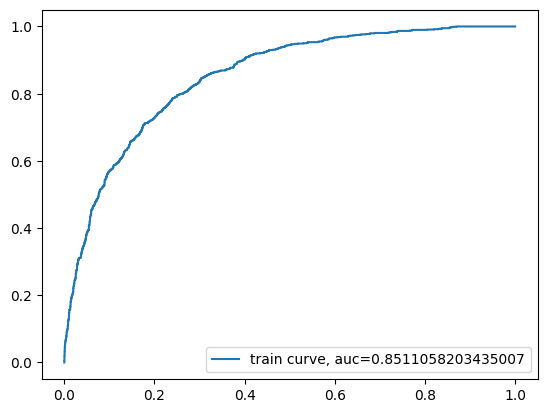

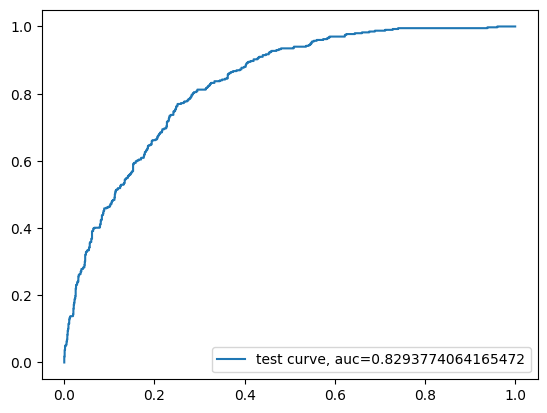

In [57]:

fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Итог: наша имплементация логистической регрессии ничуть не хуже имеющийся в sklearn и показывает +- такое же качество на roc-auc